### In the field of machine learning, it's the goal of statistical classification is to use an object's characteristics to identify which class (or group) it belongs to. 

- Logistic regression is the means by which classification is made based on predictor function that is linear, combining weights with the values of the dependent variable which in this case is our x

#### Note: This is only for a binary classification problem not multi-classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#TO remove depreciation warnings when we run the code
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
%matplotlib inline

In [2]:
class logistic_regression:
    
    def __init__(self,iterations,alpha):
        self.iterations=iterations  #choosing the number of iterations (Hyperparameter)
        self.alpha=alpha       #choosing alpha(Hyperparameter) 
    
    def sigmoid(self,z):
        return(1/(1+np.exp(-z)))    #sigmoid function
    
    def fit(self,x,y):              #(X-data for training, y - Output) 
        m=x.shape[0]                
        self.w=np.random.randn(x.shape[1],1)  #Initializing the weight
        
        cost_vals=[] 
        for i in range(2):     #For each number of iterations
            a= np.dot(x,self.w)            #multiplying the weights with the Feature values and summing them up
            z=self.sigmoid(a)         #Using link function to transform the data
            
            cost = (-1/m) *( np.dot(y,np.log(z))+(np.dot((1-y),np.log(1-z))))  #Calculating the cost function
            
            cost_vals.append(cost)        #Creating a list with all cost values for each iteration
            
            dw = np.dot(x.T,z-np.array([y])).mean()  #Calculating the gradient
            
            self.w=self.w-(self.alpha*dw)         #updating the weights
        return self
    
    def predict(self,x,threshold): 
        probability=self.sigmoid(np.dot(x,self.w))  #predicting a new set of values based on the training 

        if(probability>threshold):
            return (1)
        else:
            return (0)

In [3]:
df = pd.read_csv('pimadiabetics.csv')

In [4]:
df.shape

(768, 9)

In [5]:
df.head()

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skinfold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
class_0 = np.where(df['Class']==1)
class_1 = np.where(df['Class']==0)

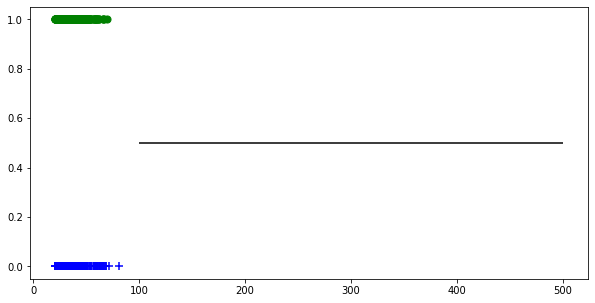

In [7]:
fig,ax1=plt.subplots(1,1,figsize=(10,5))
ax1.scatter(df.iloc[class_1]['Age'],df.iloc[class_1]['Class'],s=50,c='b',marker='+',label='One class')
ax1.scatter(df.iloc[class_0]['Age'],df.iloc[class_0]['Class'],s=50,c='g',marker='o',label="Second Class")
plt.hlines(y=0.5,xmin=100,xmax=500)

In [8]:
#Initialize the class
obj=logistic_regression(df.shape[0],0.001)

In [9]:
#Convert the features to a matrix
X = df.iloc[:,0:8].values
y = df['Class'].values

In [31]:
model = obj.fit(X,y)

In [32]:
model.predict([[1,115,70,30,96,34.6,0.529,32]],0.5)

0